# Extra Tasks

### **Task E2:** Overlapping intervals for every interval ###

**E2.1** Function Definition

In [ ]:
from intervaltree import IntervalTree

# Find overlapping intervals for each intervals
def findOverlaps(interval_tree, input_intervals, overlapping_intervals):
    
    for idx, (start, end) in enumerate(input_intervals):
        overlaps = interval_tree[start:end]
        overlapping_intervals[idx] = [overlap.data for overlap in overlaps if overlap.data != idx]
    return overlapping_intervals

**E2.2** Read Dataset

In [89]:
gff_file=open('/kaggle/input/gencode-human-genome-annotation/gencode.v44.primary_assembly.annotation.gff3', 'r')

In [90]:
# Initialize an empty list to store intervals
intervals = []

# with open('path_to_gff3_file.gff', 'r') as gff_file:
for line in gff_file:
    # Skip comment lines starting with '#'
    if not line.startswith('#'):
        fields = line.strip().split('\t')
        if len(fields) >= 5:
            if fields[0]=="chrY" and fields[2]=="exon":
                # Extract start and end positions from columns 4 and 5 (0-based index)
                start = int(fields[3])
                end = int(fields[4])
                intervals.append((start, end))

In [91]:
# Print the extracted intervals
print(len(intervals))

5301


**E2.3** Apply function with Interval Tree

In [93]:
import time

# Create an IntervalTree and populate it with the genomic regions
interval_tree = IntervalTree()
for idx, (start, end) in enumerate(intervals):
    interval_tree[start:end] = idx

# Initialize a dictionary to store the overlapping intervals for each intervals
overlapping_intervals = {}
for idx in range(len(intervals)):
    overlapping_intervals[idx] = []

start_time = time.time()
overlappings = findOverlaps(interval_tree, intervals, overlapping_intervals)
end_time = time.time()
runtime_nlogn = end_time - start_time

# Print the result
for idx, overlaps in overlappings.items():
    print(f"Interval {idx}: {overlaps}")
    
    if idx>50:  # Printing only 50 since the output is too large
        break
    
print("Runtime O(n logn):", "{:.5f}".format(runtime_nlogn), "seconds")

Interval 0: []
Interval 1: []
Interval 2: [15, 10]
Interval 3: [21, 25, 28]
Interval 4: [16, 22, 36, 39, 44, 26, 11, 29, 48]
Interval 5: [37, 12, 23, 40, 45, 49, 17, 27, 30]
Interval 6: [50, 13, 18, 31, 41, 46]
Interval 7: [14, 42, 47, 19, 32]
Interval 8: [33]
Interval 9: [34]
Interval 10: [15, 2]
Interval 11: [16, 22, 36, 39, 44, 4, 26, 29, 48]
Interval 12: [37, 23, 40, 45, 49, 17, 5, 27, 30]
Interval 13: [50, 18, 31, 6, 41, 46]
Interval 14: [42, 47, 19, 32, 7]
Interval 15: [2, 10]
Interval 16: [22, 36, 39, 44, 4, 26, 11, 29, 48]
Interval 17: [37, 12, 23, 40, 45, 49, 5, 27, 30]
Interval 18: [50, 13, 31, 6, 41, 46]
Interval 19: [14, 42, 47, 32, 7]
Interval 20: []
Interval 21: [3, 25, 28]
Interval 22: [16, 36, 39, 44, 4, 26, 11, 29, 48]
Interval 23: [37, 12, 40, 45, 49, 17, 5, 27, 30]
Interval 24: []
Interval 25: [3, 21, 28]
Interval 26: [16, 22, 36, 39, 44, 4, 11, 29, 48]
Interval 27: [37, 12, 23, 40, 45, 49, 17, 5, 30]
Interval 28: [3, 21, 25]
Interval 29: [16, 22, 36, 39, 44, 4, 26, 

**E2.4** Apply function with quadratic time 

In [94]:
def findOverlaps_n_sq(intervals):
    n = len(intervals)
    overlaps = [[] for _ in range(n)]  # Initialize an empty list for each interval

    for i in range(n):
        for j in range(n):
            if i != j:
                x1, y1 = intervals[i]
                x2, y2 = intervals[j]
                if x1 <= y2 and x2 <= y1:
                    overlaps[i].append(j)

    return overlaps

# Find overlapping intervals for each interval
start_time = time.time()
overlapping_intervals = findOverlaps_n_sq(intervals)
end_time = time.time()
runtime_n_sq = end_time - start_time


# Print the result
for i, overlaps in enumerate(overlapping_intervals):
    print(f"Interval {i}: {overlaps}")
    
    if i>50: # Printing only 50 since the output is too large
        break
print("Runtime O(n^2):", "{:.5f}".format(runtime_n_sq), "seconds")

Interval 0: []
Interval 1: []
Interval 2: [10, 15]
Interval 3: [21, 25, 28]
Interval 4: [11, 16, 22, 26, 29, 36, 39, 44, 48]
Interval 5: [12, 17, 23, 27, 30, 37, 40, 45, 49]
Interval 6: [13, 18, 31, 41, 46, 50]
Interval 7: [14, 19, 32, 42, 47]
Interval 8: [33]
Interval 9: [34]
Interval 10: [2, 15]
Interval 11: [4, 16, 22, 26, 29, 36, 39, 44, 48]
Interval 12: [5, 17, 23, 27, 30, 37, 40, 45, 49]
Interval 13: [6, 18, 31, 41, 46, 50]
Interval 14: [7, 19, 32, 42, 47]
Interval 15: [2, 10]
Interval 16: [4, 11, 22, 26, 29, 36, 39, 44, 48]
Interval 17: [5, 12, 23, 27, 30, 37, 40, 45, 49]
Interval 18: [6, 13, 31, 41, 46, 50]
Interval 19: [7, 14, 32, 42, 47]
Interval 20: []
Interval 21: [3, 25, 28]
Interval 22: [4, 11, 16, 26, 29, 36, 39, 44, 48]
Interval 23: [5, 12, 17, 27, 30, 37, 40, 45, 49]
Interval 24: []
Interval 25: [3, 21, 28]
Interval 26: [4, 11, 16, 22, 29, 36, 39, 44, 48]
Interval 27: [5, 12, 17, 23, 30, 37, 40, 45, 49]
Interval 28: [3, 21, 25]
Interval 29: [4, 11, 16, 22, 26, 36, 39, 

**E2.5** Runtime comparison

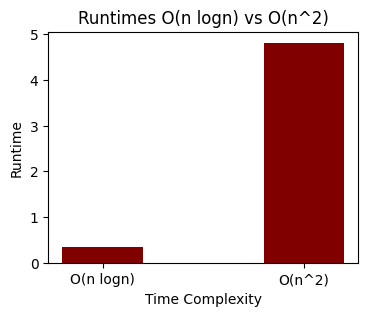

In [95]:
import numpy as np
import matplotlib.pyplot as plt
 

data = {'O(n logn)':runtime_nlogn, 'O(n^2)':runtime_n_sq}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (4, 3))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',width = 0.4)
 
plt.xlabel("Time Complexity")
plt.ylabel("Runtime")
plt.title("Runtimes O(n logn) vs O(n^2)")
plt.show()

### **Task E3:** Biological application ###

**E3.1 Biological Motivation:** 

In genomics, it is essential to identify overlapping genomic regions, such as exons or binding sites of transcription factors, to understand their functional relationships and potential regulatory mechanisms. Overlapping regions can indicate shared regulatory elements, protein binding sites, or regions of interest.

**E3.2 Dataset:** 

I have considered GENCODE Human Genome annotation dataset containing genomic coordinates of annotations from different genes. Exons are coding regions in genes, and we want to identify exons that overlap with each other.

**E3.3 Interpretation:**

The function, findOverlaps, takes the interval_tree and an empty overlapping_intervals dictionary as input. It loops through the intervals in the intervals list, retrieves overlapping intervals from the interval_tree, and stores their corresponding indices in the overlapping_intervals dictionary. Overlaps with the same index as the current interval are excluded.

Here, an IntervalTree data structure is used. Searching in an IntervalTree take O(log n) time and for n intervals, the total time complexity for the function stands out as O(n logn) which is way more efficient that quardatric time.

For the exons of Chromosome Y, here we have found runtime=0.34230 seconds for the function with an interval tree. On the other hand, runtime=4.81346 seconds for the function with quadratic time complexity.